# XGboost 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./openData/train.csv")
df_t = pd.read_csv("./openData/test.csv")

In [3]:
df

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,...,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,...,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,...,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,...,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,./train_imgs/BC_01_3464.png,-,65,2006-12-22,1,2,1,25.0,1.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
996,BC_01_3482,./train_imgs/BC_01_3482.png,-,48,2006-11-17,1,1,1,7.0,1.0,...,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0
997,BC_01_3485,./train_imgs/BC_01_3485.png,-,64,2006-11-10,1,2,1,15.0,1.0,...,NaN,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,1
998,BC_01_3502,./train_imgs/BC_01_3502.png,-,50,2006-09-22,1,1,1,7.0,1.0,...,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0


In [4]:
df.columns

Index(['ID', 'img_path', 'mask_path', '나이', '수술연월일', '진단명', '암의 위치', '암의 개수',
       '암의 장경', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'DCIS_or_LCIS_type', 'T_category', 'ER',
       'ER_Allred_score', 'PR', 'PR_Allred_score', 'KI-67_LI_percent', 'HER2',
       'HER2_IHC', 'HER2_SISH', 'HER2_SISH_ratio', 'BRCA_mutation',
       'N_category'],
      dtype='object')

In [5]:
# 'img_path'와 'mask_path' 컬럼 삭제하기
df_t = df.drop(['img_path', 'mask_path', '수술연월일',], axis=1)
df_1 = df.drop(['img_path', 'mask_path', '수술연월일',], axis=1)

df_1['암의 장경'] = df_1['암의 장경'].fillna(df_1['암의 장경'].mean())
df_1 = df_1.fillna(0)

df_t['암의 장경'] = df_t['암의 장경'].fillna(df_t['암의 장경'].mean())
df_t = df_t.fillna(0)
df_1

,ID,나이,진단명,암의 위치,암의 개수,암의 장경,NG,HG,HG_score_1,HG_score_2,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,63,1,2,1,19.000000,2.0,1.0,2.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,0.0,0.00,0.0,0
1,BC_01_0002,51,1,1,1,22.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.00,0.0,1
2,BC_01_0003,37,1,2,1,18.375564,2.0,0.0,0.0,0.0,...,7.0,1.0,4.0,7.0,0.0,1.0,0.0,0.00,0.0,0
3,BC_01_0004,54,1,2,1,0.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.00,0.0,0
4,BC_01_0005,57,1,2,1,8.000000,2.0,2.0,3.0,2.0,...,8.0,0.0,0.0,8.0,1.0,2.0,1.0,5.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,65,1,2,1,25.000000,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
996,BC_01_3482,48,1,1,1,7.000000,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
997,BC_01_3485,64,1,2,1,15.000000,1.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
998,BC_01_3502,50,1,1,1,7.000000,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0


In [6]:
df_1 = df_1.rename(columns={'진단명': 'disease', '암의 위치': "Tumor location",'암의 개수': "Number of tumors", '암의 장경': "Longest diameter of tumor", '나이': "age"})

df_1

,ID,age,disease,Tumor location,Number of tumors,Longest diameter of tumor,NG,HG,HG_score_1,HG_score_2,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,63,1,2,1,19.000000,2.0,1.0,2.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,0.0,0.00,0.0,0
1,BC_01_0002,51,1,1,1,22.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.00,0.0,1
2,BC_01_0003,37,1,2,1,18.375564,2.0,0.0,0.0,0.0,...,7.0,1.0,4.0,7.0,0.0,1.0,0.0,0.00,0.0,0
3,BC_01_0004,54,1,2,1,0.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.00,0.0,0
4,BC_01_0005,57,1,2,1,8.000000,2.0,2.0,3.0,2.0,...,8.0,0.0,0.0,8.0,1.0,2.0,1.0,5.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,65,1,2,1,25.000000,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
996,BC_01_3482,48,1,1,1,7.000000,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
997,BC_01_3485,64,1,2,1,15.000000,1.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
998,BC_01_3502,50,1,1,1,7.000000,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0


C:\Users\2022A00528\AppData\Local\Temp\ipykernel_15216\4293055116.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_1.corr()
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


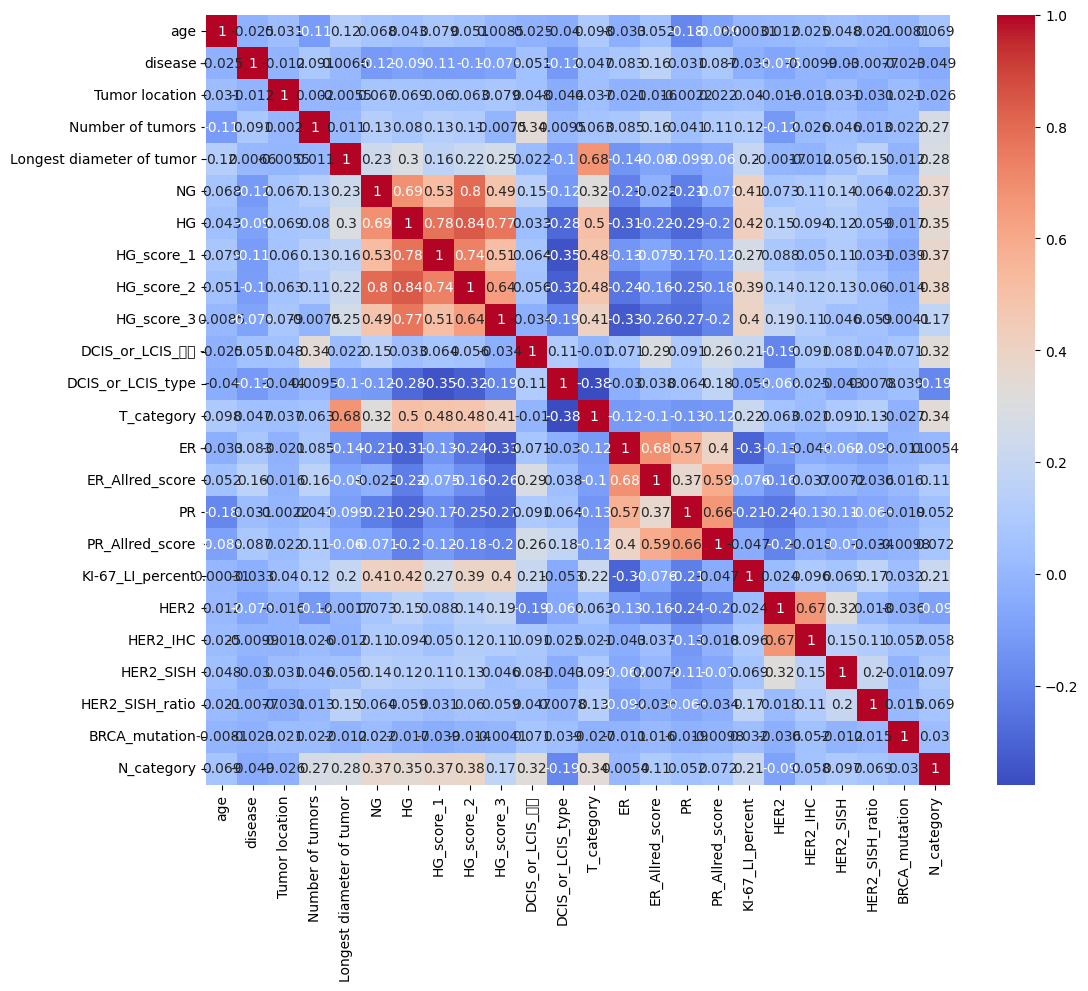

In [7]:
# 히트맵 크기 설정
plt.figure(figsize=(12, 10))

# 상관관계 계산하기
corr = df_1.corr()

# 히트맵 그리기
sns.heatmap(corr, cmap='coolwarm', annot=True)


In [8]:
# 0.5 이상인 상관관계 추출하기
high_corr = corr[abs(corr) >= 0.5].stack().reset_index()
high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]
high_corr.columns = ['feature_1', 'feature_2', 'corr']

# 결과 출력하기
print(high_corr)

                    feature_1                  feature_2      corr
5   Longest diameter of tumor                 T_category  0.675575
7                          NG                         HG  0.687829
8                          NG                 HG_score_1  0.525665
9                          NG                 HG_score_2  0.796537
10                         HG                         NG  0.687829
12                         HG                 HG_score_1  0.778550
13                         HG                 HG_score_2  0.839999
14                         HG                 HG_score_3  0.767938
15                         HG                 T_category  0.503361
16                 HG_score_1                         NG  0.525665
17                 HG_score_1                         HG  0.778550
19                 HG_score_1                 HG_score_2  0.736217
20                 HG_score_1                 HG_score_3  0.513228
21                 HG_score_2                         NG  0.79

In [9]:
# corr 열을 기준으로 내림차순으로 정렬하기
high_corr_sorted = high_corr.sort_values('corr', ascending=False)
# 중복된 상관관계 값 제거하기
high_corr_unique = high_corr_sorted.drop_duplicates(subset='corr')
# index 초기화하기
high_corr_unique = high_corr_unique.reset_index(drop=True)

# 결과 출력하기
print(high_corr_unique)



          feature_1                  feature_2      corr
0                HG                 HG_score_2  0.839999
1        HG_score_2                         NG  0.796537
2                HG                 HG_score_1  0.778550
3                HG                 HG_score_3  0.767938
4        HG_score_2                 HG_score_1  0.736217
5                NG                         HG  0.687829
6   ER_Allred_score                         ER  0.684507
7        T_category  Longest diameter of tumor  0.675575
8              HER2                   HER2_IHC  0.670022
9                PR            PR_Allred_score  0.661584
10       HG_score_3                 HG_score_2  0.641211
11  ER_Allred_score            PR_Allred_score  0.586105
12               ER                         PR  0.568615
13       HG_score_1                         NG  0.525665
14       HG_score_3                 HG_score_1  0.513228
15       T_category                         HG  0.503361


'진단명': 유방암 진단명  
'암의 위치': 유방암이 발생한 위치  
'암의 개수': 유방암 개수  
'암의 장경': 유방암의 최대 장축 길이  
'NG': 유방암의 병리학적 등급 중 중간 등급  
'HG': 유방암의 병리학적 등급 중 높은 등급  
'HG_score_1': 유방암의 병리학적 등급 중 높은 등급 1  
'HG_score_2': 유방암의 병리학적 등급 중 높은 등급 2  
'HG_score_3': 유방암의 병리학적 등급 중 높은 등급 3  
'DCIS_or_LCIS_여부': DCIS 또는 LCIS 여부  
'DCIS_or_LCIS_type': DCIS 또는 LCIS 유형  
'T_category': 유방암의 병기 분류 중 T 분류  
'ER': 에스트로겐 수용체 양성 여부  
'ER_Allred_score': 에스트로겐 수용체 양성 정도  
'PR': 프로게스테론 수용체 양성 여부  
'PR_Allred_score': 프로게스테론 수용체 양성 정도  
'KI-67_LI_percent': KI-67 LI 백분율  
'HER2': HER2 양성 여부  
'HER2_IHC': HER2 IHC 점수  
'HER2_SISH': HER2 SISH 점수  
'HER2_SISH_ratio': HER2 SISH 비율  
'BRCA_mutation': BRCA 돌연변이 여부  
'N_category': 전이여부




#### disease 유방암 종류  
1: 덕탈암 (Ductal carcinoma)  
2: 유방선암 (Lobular carcinoma)  
3: 점막질암 (Mucinous carcinoma)  
기타 (Other)  

In [10]:
df_1['disease'].unique()

array([1, 4, 2, 3], dtype=int64)

In [11]:
df_1['ID'] = df_1['ID'].astype('category')


### Xgboost 사용 Feature importance

In [12]:
import xgboost as xgb
from xgboost import plot_importance,XGBClassifier
from sklearn.model_selection import train_test_split

# 종속 변수와 독립 변수 분리하기
X = df_1.drop(['N_category', 'ID'], axis=1)
y = df_1['N_category']
seed = 42
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


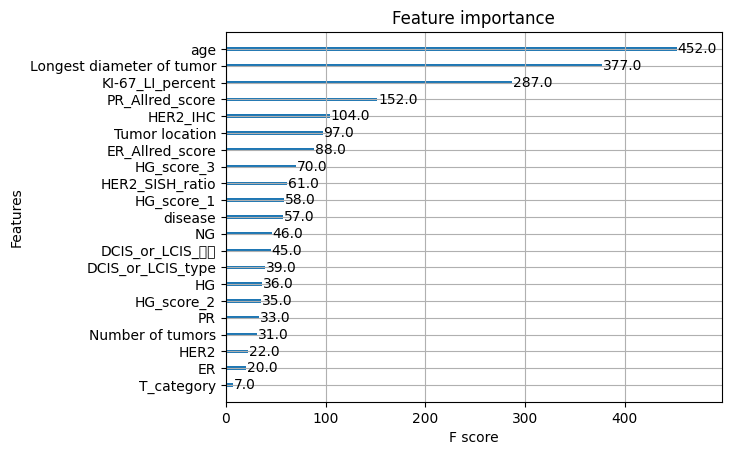

In [13]:
# XGBoost 모델 학습하기
model = xgb.XGBClassifier()
model.fit(X, y)

# feature importance 추출하기
importance = model.feature_importances_

# feature importance 시각화하기
plot_importance(model)
plt.show()

## 파라미터 최적화

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

Best parameters:  OrderedDict([('colsample_bylevel', 0.6603358884831398), ('colsample_bynode', 0.7905721379109854), ('colsample_bytree', 0.9057965336781777), ('gamma', 0.1), ('max_depth', 10), ('min_child_weight', 1), ('n_estimators', 100), ('reg_alpha', 0.02905146495870435), ('reg_lambda', 0.6803863382989398), ('subsample', 1.0)])
Best score:  0.785934850358605


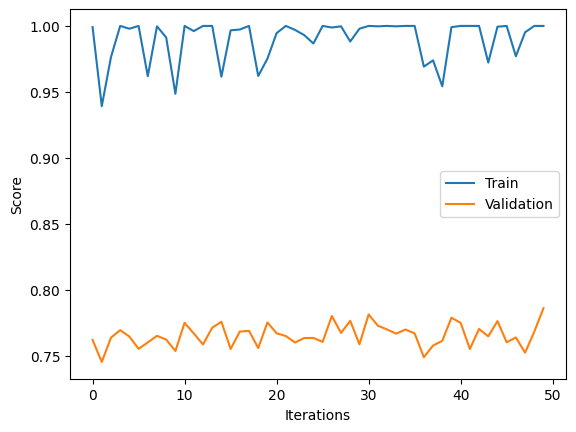

In [26]:
from scipy.stats import uniform, randint
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.plots import plot_objective, plot_convergence
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
# Define search space
search_spaces = {
    'n_estimators': Integer(100, 1000),
    'max_depth': Integer(4, 10),
    'gamma': Real(0.1, 1.0, prior='log-uniform'),
    'min_child_weight': Integer(1, 5),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'colsample_bylevel': Real(0.5, 1.0),
    'colsample_bynode': Real(0.5, 1.0),
    'reg_lambda': Real(1e-2, 1, prior='log-uniform'),
    'reg_alpha': Real(1e-2, 1, prior='log-uniform'),
}

# Define classifier
clf = XGBClassifier(objective='binary:logistic', eval_metric='auc', booster='gbtree', 
                    random_state=42, use_label_encoder=False, n_jobs=-1)

# Define search strategy
# K = 5 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
opt = BayesSearchCV(
    clf,
    search_spaces,
    n_iter=50,#50~100
    scoring='f1',
    cv=cv,
    n_jobs=-1,
    refit=True, # 가장 좋은 하이퍼파라미터로 모델을 다시 학습하여 저장
    return_train_score=True # 학습 점수도 저장
)

# Fit the model
opt.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters: ", opt.best_params_)
print("Best score: ", opt.best_score_)

# Plot learning curve
train_scores = opt.cv_results_['mean_train_score']
val_scores = opt.cv_results_['mean_test_score']
plt.plot(train_scores, label='Train')
plt.plot(val_scores, label='Validation')
plt.xlabel('Iterations')
plt.ylabel('Score')
plt.legend()
plt.show()



In [ ]:
# best_estimator = opt.best_estimator_

# # Train the model with the best hyperparameters
# best_estimator.fit(X_train, y_train)

# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(opt, X_train, y_train, cv=5)

plt.figure(figsize=(10, 5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\2022A00528\anaconda3\envs\highball\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
min_delta=0.001, # 최소변경크기
    patience=20, #학습 중지전 몇 에포크를 기다릴지
    restore_best_weights=True, # 스탑 이전에 찾은 최적의 가중치값으로 복원
)

In [73]:
tunRc = xgb.XGBClassifier(**opt.best_params_, objective='binary:logistic', eval_metric='auc', booster='gbtree', random_state = 42, n_jobs=-1)

In [74]:
tunRc.fit(X_train, y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.927613063560884,
              colsample_bynode=0.8498920838246313, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=1.0, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [75]:
y_pred = tunRc.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds']))     #  X_train, X_test, y_train, y_test

              precision    recall  f1-score   support

   No Frauds       0.81      0.74      0.77       100
      Frauds       0.76      0.83      0.79       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



In [77]:
classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)

{'No Frauds': {'precision': 0.8131868131868132,
  'recall': 0.74,
  'f1-score': 0.774869109947644,
  'support': 100},
 'Frauds': {'precision': 0.7614678899082569,
  'recall': 0.83,
  'f1-score': 0.7942583732057417,
  'support': 100},
 'accuracy': 0.785,
 'macro avg': {'precision': 0.787327351547535,
  'recall': 0.7849999999999999,
  'f1-score': 0.7845637415766928,
  'support': 200},
 'weighted avg': {'precision': 0.787327351547535,
  'recall': 0.785,
  'f1-score': 0.7845637415766927,
  'support': 200}}

In [78]:
f1score = classification_report(y_test, y_pred, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['f1-score']
f1score

0.7845637415766928

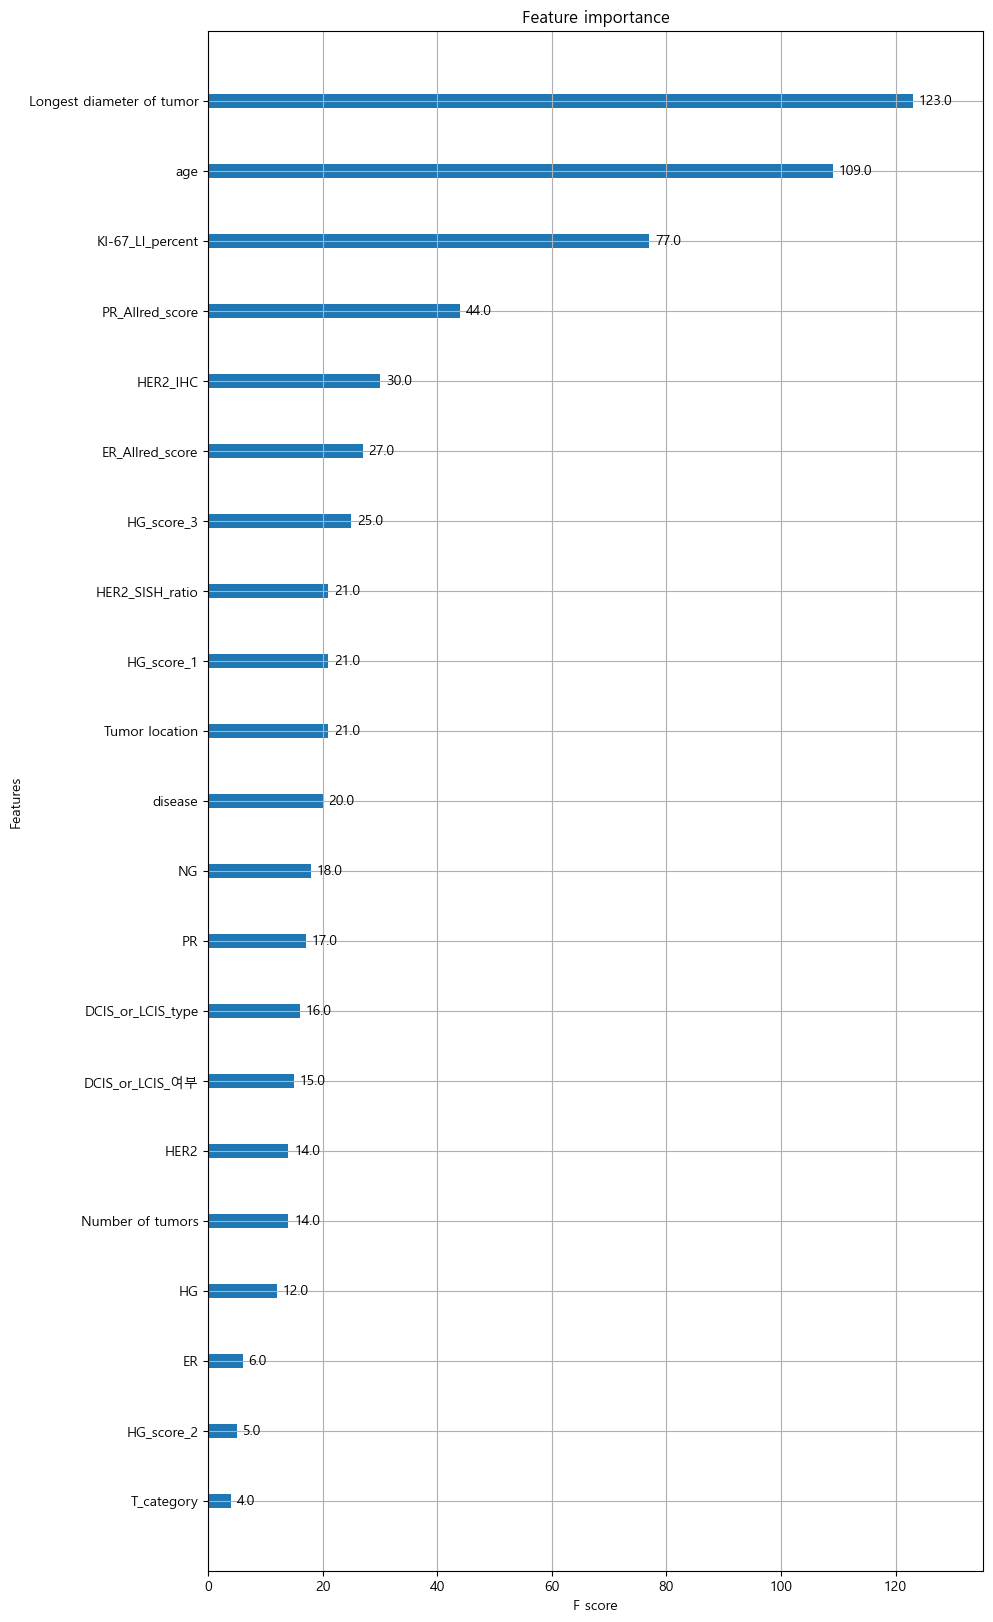

In [79]:
plt.rc('font', family='Malgun Gothic') 

fig, ax = plt.subplots(figsize=(10, 20))
xgb.plot_importance(tunRc, ax=ax)
plt.show()

In [91]:
y_pred = tunRc.predict(X_test)
predictions = [round(value) for value in y_pred]

In [92]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.215

In [93]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.50%


In [94]:
df_t

,ID,age,disease,Tumor location,Number of tumors,Longest diameter of tumor,NG,HG,HG_score_1,HG_score_2,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,63,1,2,1,19.000000,2.0,1.0,2.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,0.0,0.00,0.0,0
1,BC_01_0002,51,1,1,1,22.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.00,0.0,1
2,BC_01_0003,37,1,2,1,18.375564,2.0,0.0,0.0,0.0,...,7.0,1.0,4.0,7.0,0.0,1.0,0.0,0.00,0.0,0
3,BC_01_0004,54,1,2,1,0.000000,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.00,0.0,0
4,BC_01_0005,57,1,2,1,8.000000,2.0,2.0,3.0,2.0,...,8.0,0.0,0.0,8.0,1.0,2.0,1.0,5.44,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,BC_01_3464,65,1,2,1,25.000000,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
996,BC_01_3482,48,1,1,1,7.000000,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0
997,BC_01_3485,64,1,2,1,15.000000,1.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1
998,BC_01_3502,50,1,1,1,7.000000,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0


In [95]:
df_t = df_t.rename(columns={'진단명': 'disease', '암의 위치': "Tumor location",'암의 개수': "Number of tumors", '암의 장경': "Longest diameter of tumor", '나이': "age"})
X_t = df_t.drop(['N_category', 'ID'], axis=1)
y_t = df_t['N_category']
y_pred_t = tunRc.predict(X_t)


In [96]:
predictions = [round(value) for value in y_pred_t]

In [97]:
mean_squared_error(y_t, y_pred_t)


0.07

In [98]:
accuracy = accuracy_score(y_t, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.00%


In [99]:
classification_report(y_t, y_pred_t, target_names=['No Frauds', 'Frauds'], output_dict=True)

{'No Frauds': {'precision': 0.9297520661157025,
  'recall': 0.9259259259259259,
  'f1-score': 0.9278350515463917,
  'support': 486},
 'Frauds': {'precision': 0.9302325581395349,
  'recall': 0.933852140077821,
  'f1-score': 0.9320388349514562,
  'support': 514},
 'accuracy': 0.93,
 'macro avg': {'precision': 0.9299923121276187,
  'recall': 0.9298890330018734,
  'f1-score': 0.929936943248924,
  'support': 1000},
 'weighted avg': {'precision': 0.9299990390159524,
  'recall': 0.93,
  'f1-score': 0.929995796216595,
  'support': 1000}}

In [100]:
precision = classification_report(y_t, y_pred_t, target_names=['No Frauds', 'Frauds'], output_dict=True)['macro avg']['precision']


In [101]:
precision

0.9299923121276187